In [1]:
# 1. Import the following libraries: 
# pip install pandas numpy matplotlib statsmodels

# pandas (for data manipulation)
import pandas as pd
    
# numpy (for numerical operations)
import numpy as np
    
# matplotlib (for data visualization)
import matplotlib as plt 
    
# statsmodels (to use ARIMA)
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller, acf, pacf

In [2]:
# 2. Importing stock data using AlphaVantage API

#Install AlphaVantage and import libraries if not already imported
# !pip install alpha_vantage
# import pandas as pd
# import matplotlib.pyplot as plt
from alpha_vantage.timeseries import TimeSeries

#Free API key
key = 'UO4WWNLT3XIKJ6EI'

# Create TimeSeries object
ts = TimeSeries(key, output_format='pandas') #requires input of key and output format (default is json)

# Sample API Call for Tesla
#objects come with a data and a meta component (will likely only need data component), require a stock symbol + interval + output size
data, meta = ts.get_intraday('TSLA', interval = '1min', outputsize='full') 


In [3]:
# 3. Modify the dataset

# Keep relevant columns - closing price and date
closing_data = data['4. close']

In [4]:
# 4. Separate the data into training and testing datasets


<AxesSubplot:xlabel='date'>

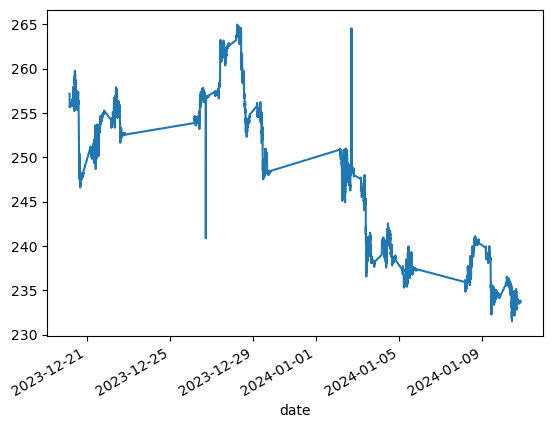

In [5]:
# 5.1 Visualize the data

# Plot the data for visualization
closing_data.plot()

In [6]:
# 5.2 Conduct the ADF test and determine the value for d 

# Conduct the ADF test, which determines if the data is stationary or not
result = adfuller(closing_data)

# Keeps track of the number of times differencing was needed 
d = 0

# If the data is not stationary, differencing is needed to convert it into stationary data
# The p-value has to be less than 0.05 for the dataset to be considered stationary 
while True:
    print('p-value: ', result[1])
    if result[1] < 0.05:
        break
    else:
        result = adfuller(closing_data.diff().dropna())
        d += 1

print('\nd value: ', d)

p-value:  0.6044114973438228
p-value:  0.0

d value:  1


In [7]:
# 6. Optimize the parameters (p, d, q) and create the ARIMA model

    # Determine (p,d,q) based on the data's characteristics
    # ACF plot is used to determine p (autoregressive AR)
    # PACF plot is used to determine q (moving average MA)
    
    # Create the ARIMA model object and fit it to the data
    
    # Examples of useful python code:
    # p, d, q = 1, 1, 1
    # model = ARIMA(data, order(p,d,q))
    # model_fit = model.fit()

In [8]:
# 6.1 Determine the best p and q values
# The best p,q,d values will produce the lowest aic value 

import warnings
warnings.filterwarnings("ignore")

# Defines ranges for p and q
p = q = range(0, 4)

# List to store all pdq combinations
pdq = []
# Appends each combination of p,d,q to the list
for p_value in p:
    for q_value in q:
        pdq.append((p_value, d, q_value))

# Initialize best aic to start at infinity
best_aic = float('inf')  
# Initialize best pqd combination 
best_pdq = None

# Test each combination 
for combination in pdq:
    # Fit the arima model 
    model = ARIMA(closing_data, order=(combination))
    model_fit = model.fit()
    
    # If the aic value is lower than the current best aic, it will be replaced
    if model_fit.aic < best_aic:
        best_aic = model_fit.aic
        best_pdq = combination

# Extract the p and q values
p = best_pdq[0]
q = best_pdq[2]

print('p value: ', p)
print('q value: ', q)

p value:  1
q value:  1


In [9]:
# 6.2 Create the ARIMA model with the p, d, q values determined
model = ARIMA(closing_data, order=(p,d,q))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:               4. close   No. Observations:                13439
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3821.594
Date:                Wed, 10 Jan 2024   AIC                           7649.188
Time:                        22:34:18   BIC                           7671.705
Sample:                             0   HQIC                          7656.699
                              - 13439                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0922      0.003     31.617      0.000       0.087       0.098
ma.L1         -0.5310      0.003   -178.926      0.000      -0.537      -0.525
sigma2         0.1034   5.83e-05   1772.946      0.0

In [ ]:
# 7. Train the ARIMA model

    # Train the model using model_fit = model.fit()
    # Forecast the time series usin model_fit.forecast()
    # model_fit.forecast(steps=6)   #'steps' parameter for # of future steps to forecast
    # Analyze the model's performance by comparing the predicted values with actual values from the testing dataset
    # print(model_fit.summary())

In [ ]:
# a. Observe what the predictions look like
    # Predicted values:
    # y_pred = pd.Series(model.forecast(test_set_size)[0], index=df.value[sample_size].index)
    # Actual values:
    # y_true = df.value[sample_size]

    # Print predictions
    # print(np.array(y_pred).astype(np.uint8))

In [ ]:
# b. Measure error of predictions using error metrics/functions popular for general regression models
    # Mean absolute error
    # mae = np.mean(np.abs(y_pred - y_true))
    
    # Mean absolute percentage error
    # mape = np.mean(np.abs(y_pred - y_true)/np.abs(y_true))
    
    # Mean percentage error
    # mpe = np.mean((y_pred - y_true)/y_true)
    
    # Root mean squared
    # rmse = np.mean((y_pred - y_true)**2)**.5
    
    # Correlation Coefficient
    # corr = np.corrcf(y_pred, y_true)[0, 1]
    
    
    # Mean absolute scaled error (better for time-series data)
    # n = np.array(df[sample_size]).shape[0]
    # d = np.abs(np.diff(np.array(df[sample_size].value))).sum()/(n-1)
    
    # errors = np.abs(y_true - y_pred)
    # print(errors.mean()/d)